# INM430: Principles of Data Science: Lab03

# Data Processing & Summarization

## Tutorials and Exercises

### Import necessary libraries

In [1]:
# for basic operations
import pandas as pd
import numpy as np

# for visualisation
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline
import pylab

# for statistics
import math
import statsmodels.api as sm
from sklearn import preprocessing

# to see all the columns in tabular view
pd.set_option('display.max_columns', None)

# for ignoring warnings
import warnings
warnings.filterwarnings('ignore')

### Part 1: Outliers

Here we consider ways in which we can identify outliers and the effect that these have.

1. Load the data on properties of cars into a pd dataframe
2. Plot suitable graphs to show the distributions and help indicate outliers of priceand mileage (e.g. with boxplots) and their joint distribution (e.g. with a scatterplot)
3. (Visually) identify the outliers.
4. Add two new columns to the dataframe called isOutlierPrice, isOutlierMileage. For the price column, calculate the mean and standard deviation. Use the standard deviation and mean to try to identify outliers for these two variables and mark them with a 1 in the isOutlierPrice and isOutlierMilage columns. For example, you could look for values that are more than 2 standard deviations away from the mean. You can either use a loop and the Pandas loc() function to access and update values, or you can use the more efficient Pandas methods that are summarised in the Cheat Sheet that you used a bit of last week.
5. Show these "outliers" using a different colour (hue) in the plot. Are these what you would consider outliers? Observe whether they are the same as you would mark them.
6. Optional: Use Mahalanobis distance to identify 2D outliers. You can compute a 2D Mahalanobis distance for each row using a scipy's cdist() function). For this, you need to find the 2D mean vector and find the 2D Mahalanobis distance of each point to this mean vector. Finally, colour all the points according to their Mahalanobis Distance. Here is a matplotlib example that uses colouring and choose an appropriate colour map here (use a sequential lightness-based colour scheme). Compare your outlier observation step-3 to the resulting scatterplot.

#### 1. Load the data

In [2]:
df_1 = pd.read_csv('accord_sedan.csv')

In [3]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   price         417 non-null    int64 
 1   mileage       417 non-null    int64 
 2   year          417 non-null    int64 
 3   trim          417 non-null    object
 4   engine        417 non-null    object
 5   transmission  417 non-null    object
dtypes: int64(3), object(3)
memory usage: 19.7+ KB


In [4]:
df_1.describe(include='all')

price        mileage    year trim engine transmission
count     417.000000     417.000000   417.0  417    417          417
unique           NaN            NaN     NaN    3      2            2
top              NaN            NaN     NaN   ex  4 Cyl    Automatic
freq             NaN            NaN     NaN  288    238          382
mean    12084.242206   89725.779376  2006.0  NaN    NaN          NaN
std      2061.430034   25957.872271     0.0  NaN    NaN          NaN
min      6900.000000   19160.000000  2006.0  NaN    NaN          NaN
25%     10779.000000   71844.000000  2006.0  NaN    NaN          NaN
50%     11995.000000   89900.000000  2006.0  NaN    NaN          NaN
75%     13000.000000  106705.000000  2006.0  NaN    NaN          NaN
max     18995.000000  149269.000000  2006.0  NaN    NaN          NaN

In [5]:
df_1.head() 

price  mileage  year trim engine transmission
0  14995    67697  2006   ex  4 Cyl       Manual
1  11988    73738  2006   ex  4 Cyl       Manual
2  11999    80313  2006   lx  4 Cyl    Automatic
3  12995    86096  2006   lx  4 Cyl    Automatic
4  11333    79607  2006   lx  4 Cyl    Automatic

In [6]:
df_1.trim.value_counts()

ex     288
lx     120
exl      9
Name: trim, dtype: int64

In [7]:
df_1.engine.value_counts()

4 Cyl    238
6 Cyl    179
Name: engine, dtype: int64

#### 2. Plot suitable graphs

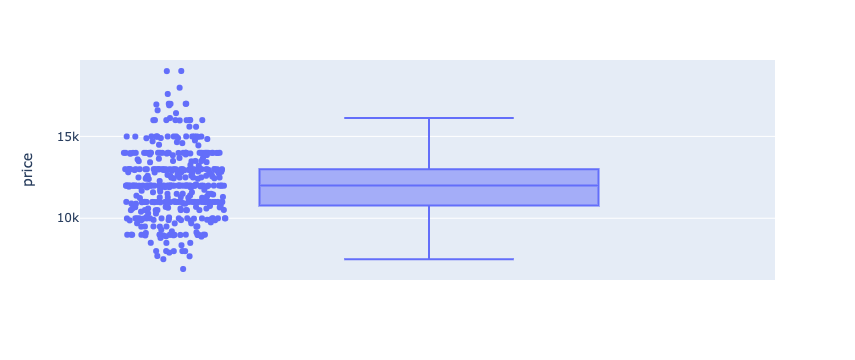

In [8]:
fig = px.box(df_1, y="price", points = 'all')
fig.show()

##### Comments

It looks like 3 or 4 outliers in the higher range and 1 in the lower range.

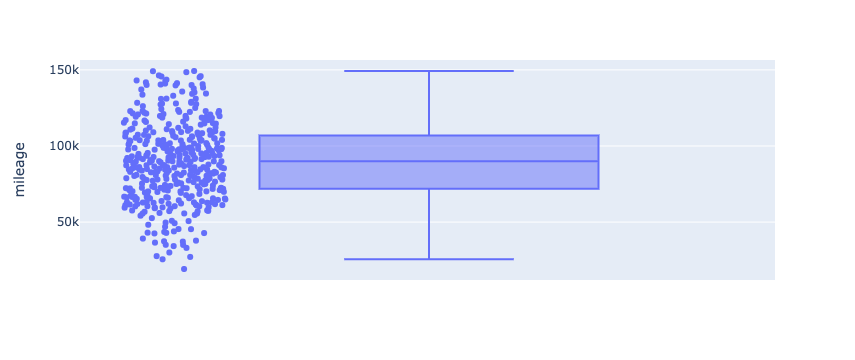

In [9]:
fig = px.box(df_1, y="mileage", points = 'all')
fig.show()

##### Comments

In mileage column though, we can only se 1 obvious data point in the lower range that we can identify as outlier.

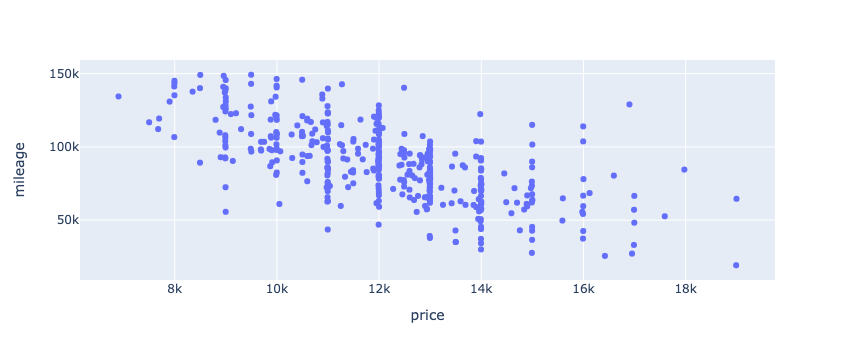

In [10]:
fig = px.scatter(df_1, x="price", y="mileage")
fig.show()

##### Comments

By looking at the scatter chart, we can identify 5 or six data points as outliers.

#### 3. Create isOutlier Columns

In [11]:
# calculate standard deviations
std_prc = df_1['price'].std()
std_mlg = df_1['mileage'].std()

mean_prc = df_1['price'].mean()
mean_mlg = df_1['mileage'].mean()

range_multiplier_prc = 2
range_multiplier_mlg = 2

In [12]:
# Assign mean and standard deviation values to variables
print('Price Std:', std_prc)
print('Mileage Std:', std_mlg)
print('---')
print('Price Mean:', mean_prc)
print('Mileage Mean:', mean_mlg)

Price Std: 2061.430033967955
Mileage Std: 25957.872270688917
---
Price Mean: 12084.242206235012
Mileage Mean: 89725.7793764988


In [13]:
# for price
# add the new empty column
df_1['isOutlierPrice'] = ""

# assign isOutlier values conditionally 
df_1['isOutlierPrice'] = np.where(np.logical_or(df_1['price'] < (mean_prc - range_multiplier_prc*std_prc),
                                                df_1['price'] > (mean_prc + range_multiplier_prc*std_prc)),
                                  'Yes', 
                                  'No')

# for mileage
# add the new empty column
df_1['isOutlierMileage'] = ""

# assign isOutlier values conditionally 
df_1['isOutlierMileage'] = np.where(np.logical_or(df_1['mileage'] < (mean_mlg - range_multiplier_mlg*std_mlg),
                                                  df_1['mileage'] > (mean_mlg + range_multiplier_mlg*std_mlg)),
                                    'Yes', 
                                    'No')

df_1.head()

price  mileage  year trim engine transmission isOutlierPrice  \
0  14995    67697  2006   ex  4 Cyl       Manual             No   
1  11988    73738  2006   ex  4 Cyl       Manual             No   
2  11999    80313  2006   lx  4 Cyl    Automatic             No   
3  12995    86096  2006   lx  4 Cyl    Automatic             No   
4  11333    79607  2006   lx  4 Cyl    Automatic             No   

  isOutlierMileage  
0               No  
1               No  
2               No  
3               No  
4               No

In [14]:
df_1['isOutlierPrice'].value_counts()

No     400
Yes     17
Name: isOutlierPrice, dtype: int64

In [15]:
df_1['isOutlierMileage'].value_counts()

No     393
Yes     24
Name: isOutlierMileage, dtype: int64

#### 4. Show these "outliers" using a different colour

In [16]:
# Turn isOutlierPrice and isOutlierMileage columns to a single isOutlier column
df_1['isOutlier'] = np.where(np.logical_and(df_1['isOutlierPrice'] == 'Yes',
                                            df_1['isOutlierMileage']  == 'Yes'),
                             'Yes',
                             'No')

In [17]:
df_1.isOutlier.value_counts()

No     413
Yes      4
Name: isOutlier, dtype: int64

##### Price Outliers

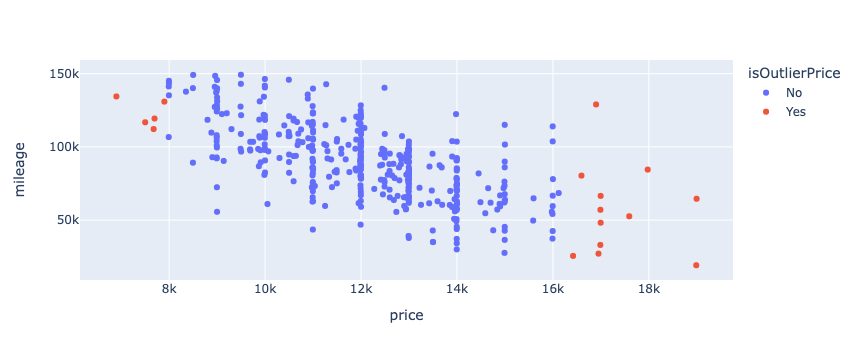

In [57]:
fig = px.scatter(df_1, x="price", y="mileage", color='isOutlierPrice')
fig.show()

##### Mileage Outliers

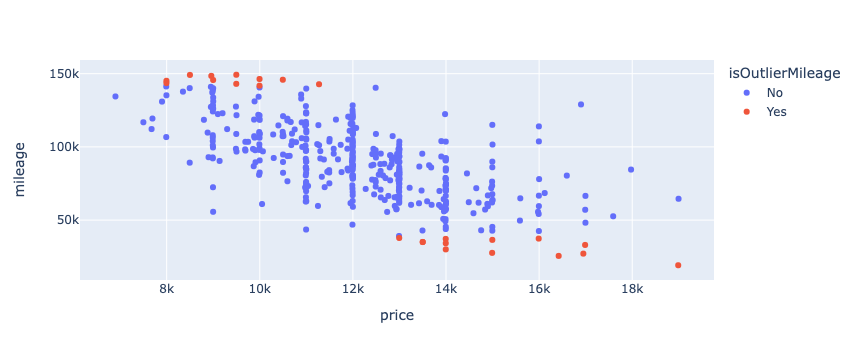

In [58]:
fig = px.scatter(df_1, x="price", y="mileage", color='isOutlierMileage')
fig.show()

##### Outliers for both column

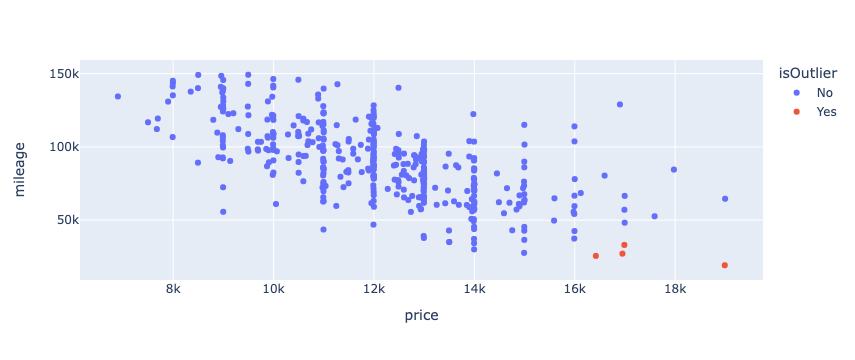

In [59]:
fig = px.scatter(df_1, x="price", y="mileage", color='isOutlier')
fig.show()

##### Comments

There are 4 outlier points in the data. The criteria has been selected that if both price and mileage is outliers, the point is considered as an outlier.

#### 5. Use Mahalanobis distance to identify 2D outliers

In [19]:
import scipy

In [20]:
# pass columns into arrays
array_prc = df_1.iloc[:,0:1].values
array_mlg = df_1.iloc[:,1:2].values

In [21]:
array_prc.shape

(417, 1)

In [22]:
array_mlg.shape

(417, 1)

In [23]:
array_dist = scipy.spatial.distance.cdist(array_prc, array_mlg, 'euclidean')

In [24]:
array_dist.shape

(417, 417)

In [25]:
(array_dist - array_prc).shape

(417, 417)

##### Example supplied in tutorial guide

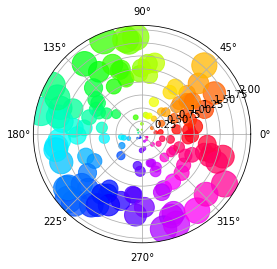

In [26]:
# Compute areas and colors
N = 150
r = 2 * np.random.rand(N)
theta = 2 * np.pi * np.random.rand(N)
area = 200 * r**2
colors = theta

ax = plt.subplot(111, projection='polar')
c = ax.scatter(theta, r, c=colors, s=area, cmap='hsv', alpha=0.75)

plt.show()

In [27]:
theta.shape

(150,)

In [28]:
r.shape

(150,)

### Part 2: Q-Q Plots

Q-Q Plots are designed for visually comparing your distributions to known distributions. Here we use statsmodels qqplot() function to compare the distributions of our data to known theoretical distributions.

1. Download the csv data file from WHO on Tuberculosis (from Week01). Information on the data can be found on WHO's web page. You may need to replace missing values before you start.
2. Pick one of the columns from the Tuberculosis data and compare to a normal distribution. See this link for various distributions and functions to use in data sampling and in particular consider sampling from the normal distribution in this case as explained in this example. Use the statsmodels qqplot() function to generate a qqplot. Compare this to a histogram representation.

#### 1. Load the data and replace the missing values

In [29]:
df_2 = pd.read_csv('TB_burden_countries_2014-09-29.csv')

In [30]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4903 entries, 0 to 4902
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   4903 non-null   object 
 1   iso2                      4880 non-null   object 
 2   iso3                      4903 non-null   object 
 3   iso_numeric               4903 non-null   int64  
 4   g_whoregion               4903 non-null   object 
 5   year                      4903 non-null   int64  
 6   e_pop_num                 4903 non-null   int64  
 7   e_prev_100k               4892 non-null   float64
 8   e_prev_100k_lo            4892 non-null   float64
 9   e_prev_100k_hi            4892 non-null   float64
 10  e_prev_num                4892 non-null   float64
 11  e_prev_num_lo             4892 non-null   float64
 12  e_prev_num_hi             4892 non-null   float64
 13  e_mort_exc_tbhiv_100k     4902 non-null   float64
 14  e_mort_e

In [31]:
df_2.describe(include='all')

country  iso2  iso3  iso_numeric g_whoregion         year  \
count          4903  4880  4903  4903.000000        4903  4903.000000   
unique          219   218   219          NaN           6          NaN   
top     Afghanistan    AF   AFG          NaN         EUR          NaN   
freq             23    23    23          NaN        1227          NaN   
mean            NaN   NaN   NaN   433.487457         NaN  2001.042219   
std             NaN   NaN   NaN   255.202944         NaN     6.643548   
min             NaN   NaN   NaN     4.000000         NaN  1990.000000   
25%             NaN   NaN   NaN   212.000000         NaN  1995.000000   
50%             NaN   NaN   NaN   430.000000         NaN  2001.000000   
75%             NaN   NaN   NaN   646.000000         NaN  2007.000000   
max             NaN   NaN   NaN   894.000000         NaN  2012.000000   

           e_pop_num  e_prev_100k  e_prev_100k_lo  e_prev_100k_hi  \
count   4.903000e+03  4892.000000     4892.000000     4892.000000   
unique           NaN          NaN             NaN             NaN   
top              NaN          NaN             NaN             NaN   
freq             NaN          NaN             NaN             NaN   
mean    2.899179e+07   207.694422       93.683299      378.137001   
std     1.177827e+08   269.720954      138.015090      501.059424   
min     1.129000e+03     0.260000        0.080000        0.540000   
25%     5.508830e+05    25.000000       10.000000       46.000000   
50%     5.140332e+06    93.000000       37.000000      164.000000   
75%     1.732282e+07   306.000000      129.250000      526.500000   
max     1.377065e+09  1860.000000     1316.000000     3565.000000   

          e_prev_num  e_prev_num_lo  e_prev_num_hi  e_mort_exc_tbhiv_100k  \
count   4.892000e+03   4.892000e+03   4.892000e+03            4902.000000   
unique           NaN            NaN            NaN                    NaN   
top              NaN            NaN            NaN                    NaN   
freq             NaN            NaN            NaN                    NaN   
mean    6.914368e+04   4.366106e+04   1.064607e+05              16.245420   
std     3.304527e+05   2.729764e+05   4.152786e+05              23.916259   
min     0.000000e+00   0.000000e+00   1.000000e-02               0.000000   
25%     4.000000e+02   1.600000e+02   7.800000e+02               1.400000   
50%     4.600000e+03   1.900000e+03   8.200000e+03               5.400000   
75%     3.000000e+04   1.300000e+04   5.300000e+04              22.000000   
max     4.600000e+06   4.000000e+06   5.200000e+06             221.000000   

        e_mort_exc_tbhiv_100k_lo  e_mort_exc_tbhiv_100k_hi  \
count                4902.000000               4902.000000   
unique                       NaN                       NaN   
top                          NaN                       NaN   
freq                         NaN                       NaN   
mean                    7.022778                 52.846930   
std                     9.322420               1428.832122   
min                     0.000000                  0.000000   
25%                     0.740000                  1.900000   
50%                     3.150000                  8.750000   
75%                    10.000000                 39.000000   
max                    87.000000             100000.000000   

        e_mort_exc_tbhiv_num  e_mort_exc_tbhiv_num_lo  \
count            4902.000000              4902.000000   
unique                   NaN                      NaN   
top                      NaN                      NaN   
freq                     NaN                      NaN   
mean             5846.978156              3185.193419   
std             28849.999011             18631.006122   
min                 0.000000                 0.000000   
25%                17.000000                 8.100000   
50%               280.000000               150.000000   
75%              2100.000000               900.000000   
max      

In [32]:
df_2.head() 

country iso2 iso3  iso_numeric g_whoregion  year  e_pop_num  \
0  Afghanistan   AF  AFG            4         EMR  1990   11731193   
1  Afghanistan   AF  AFG            4         EMR  1991   12612043   
2  Afghanistan   AF  AFG            4         EMR  1992   13811876   
3  Afghanistan   AF  AFG            4         EMR  1993   15175325   
4  Afghanistan   AF  AFG            4         EMR  1994   16485018   

   e_prev_100k  e_prev_100k_lo  e_prev_100k_hi  e_prev_num  e_prev_num_lo  \
0        327.0           112.0           655.0     38000.0        13000.0   
1        359.0           172.0           613.0     45000.0        22000.0   
2        387.0           169.0           693.0     53000.0        23000.0   
3        412.0           186.0           724.0     62000.0        28000.0   
4        431.0           199.0           751.0     71000.0        33000.0   

   e_prev_num_hi  e_mort_exc_tbhiv_100k  e_mort_exc_tbhiv_100k_lo  \
0        77000.0                   31.0                       7.3   
1        77000.0                   35.0                       9.1   
2        96000.0                   39.0                      11.0   
3       110000.0                   42.0                      13.0   
4       120000.0                   46.0                      15.0   

   e_mort_exc_tbhiv_100k_hi  e_mort_exc_tbhiv_num  e_mort_exc_tbhiv_num_lo  \
0                      72.0                3700.0                    860.0   
1                      78.0                4400.0                   1100.0   
2                      83.0                5300.0                   1500.0   
3                      89.0                6400.0                   1900.0   
4                      95.0                7600.0                   2400.0   

   e_mort_exc_tbhiv_num_hi source_mort  e_inc_100k  e_inc_100k_lo  \
0                   8500.0    Indirect       189.0          117.0   
1                   9800.0    Indirect       189.0          147.0   
2                  12000.0    Indirect       189.0          131.0   
3                  14000.0    Indirect       189.0          139.0   
4                  16000.0    Indirect       189.0          147.0   

   e_inc_100k_hi  e_inc_num  e_inc_num_lo  e_inc_num_hi  e_tbhiv_prct  \
0          279.0    22000.0       14000.0       33000.0          0.18   
1          236.0    24000.0       19000.0       30000.0          0.19   
2          258.0    26000.0       18000.0       36000.0          0.20   
3          247.0    29000.0       21000.0       38000.0          0.20   
4          237.0    31000.0       24000.0       39000.0          0.21   

   e_tbhiv_prct_lo  e_tbhiv_prct_hi  e_inc_tbhiv_100k  e_inc_tbhiv_100k_lo  \
0              NaN              NaN              0.35                 0.22   
1              NaN              NaN              0.36                 0.19   
2              NaN              NaN              0.37                 0.19   
3              NaN              NaN              0.38                 0.20   
4              NaN              NaN              0.40                 0.21   

   e_inc_tbhiv_100k_hi  e_inc_tbhiv_num  e_inc_tbhiv_num_lo  \
0                 0.52             41.0                25.0   
1                 0.58             45.0                24.0   
2                 0.62             51.0                26.0   
3                 0.63             58.0                30.0   
4                 0.64             65.0                35.0   

   e_inc_tbhiv_num_hi source_tbhiv  c_cdr  c_cdr_lo  c_cdr_hi  
0                60.0        Model   20.0      13.0      32.0  
1                73.0        Model   97.0      77.0     120.0  
2                86.0        Model    NaN       NaN       NaN  
3                95.0        Model    NaN       NaN       NaN  
4               100.0        Model    NaN       NaN       NaN

##### Select a column and replace its missing values

Let's select the **e_prev_100k_lo** column and look at the distribution of the values. Then we'll think about how to replace the missing values for this column.

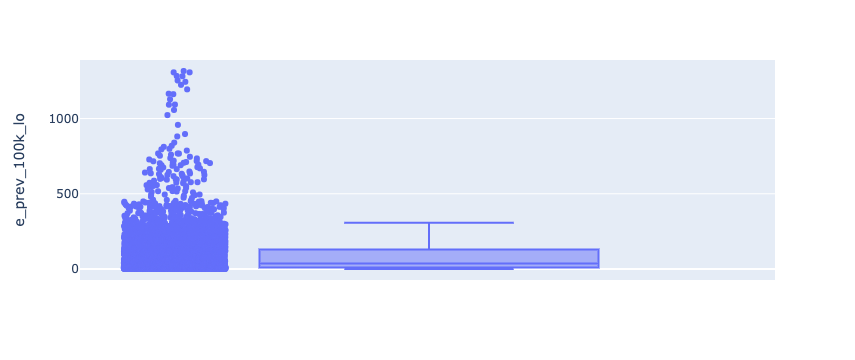

In [33]:
fig = px.box(df_2, y="e_prev_100k_lo", points = 'all')
fig.show()

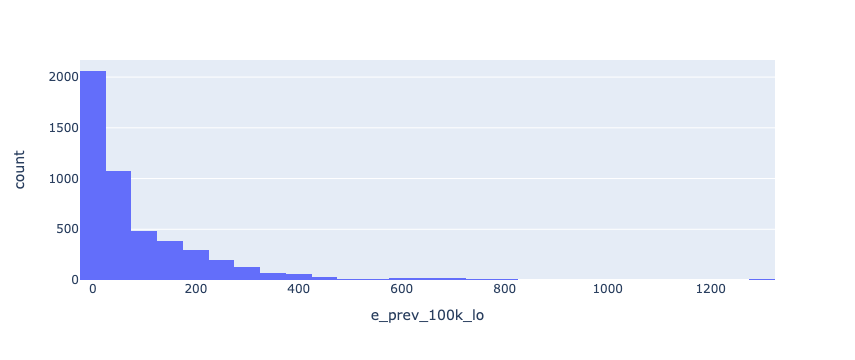

In [34]:
fig = px.histogram(df_2, x="e_prev_100k_lo", nbins=30)
fig.show()

##### Comments

This is a positively skewed distribution. Replace the values with the mean.

In [35]:
df_2.e_prev_100k_lo.replace(np.nan, df_2.e_prev_100k_lo.mean(), inplace = True)

#### 2. Compare the column to a normal distribution 

In [36]:
# create a normal distribution

# define the mean and standard deviation
mean = 0
stdev = 1

np.random.seed(177)

df_nd = pd.DataFrame(np.random.normal(mean, stdev, 100))

In [37]:
df_nd.head()

0
0  1.495589
1  0.014815
2 -1.324101
3 -0.234269
4  0.831749

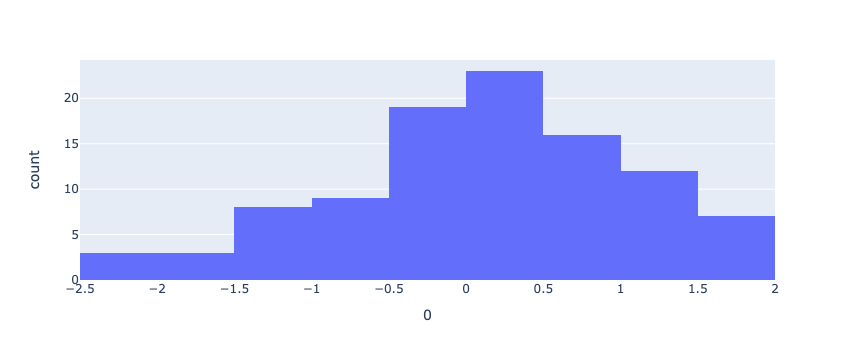

In [38]:
fig = px.histogram(df_nd, x=0, nbins=10)
fig.show()

##### Plot QQ plot for the normal distribution

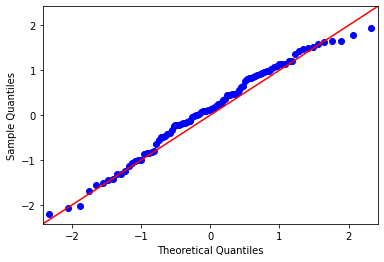

In [39]:
sm.qqplot(df_nd[0], line='45')
pylab.show()

##### Plot QQ plot for the e_prev_100k_lo column

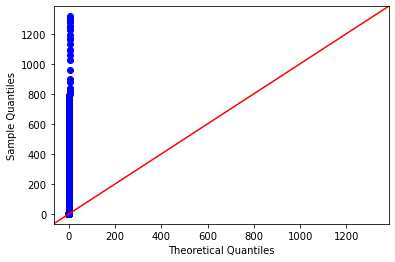

In [40]:
sm.qqplot(df_2.e_prev_100k_lo, line='45')
pylab.show()

Normalize the column and plot QQ plot again.

##### Normalize e_prev_100k_lo column

In [41]:
# normalizing e_prev_100k_lo column
mx = df_2.e_prev_100k_lo.max()
mn = df_2.e_prev_100k_lo.min()
df_2.e_prev_100k_lo_n = (df_2.e_prev_100k_lo - mn) / (mx - mn)

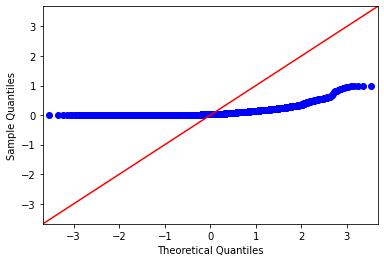

In [42]:
sm.qqplot(df_2.e_prev_100k_lo_n, line='45')
pylab.show()

##### Try plotting QQ plt without any lines (to overcome scale problem)

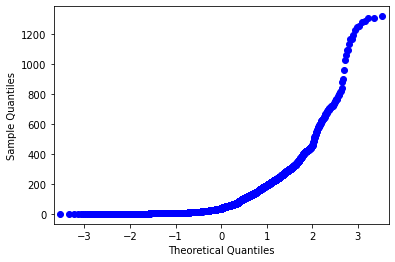

In [43]:
sm.qqplot(df_2.e_prev_100k_lo)
pylab.show()

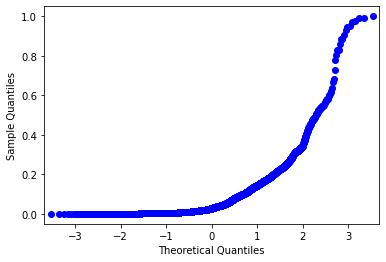

In [44]:
sm.qqplot(df_2.e_prev_100k_lo_n)
pylab.show()

##### Comments

Two charts shows the same view independent from normalization. When we normalize the variable, we can see that Sample Quantiles have been scaled in the range 0-1. The view matches to **the positively skewed QQ plot example in the week03 lecture**.

### Part 3: Distributions & Sampling & Robust Statistics

During the lectures, we discussed on how we make inferences based on the samples we get from distributions and how volatile they can be. We looked into this interactive tool to discuss how much descrtiptive statistics can vary and tell a different story regarding the underlying data and the models that they follow. You can take some time to play with this interactive tool to observe that.

In the first part of this example, we'll get samples of varying sizes from different distributions and observe how the descriptive statistics change.

1. Randomly sample data from a known distribution (you can choose to sample from a normal distribution as we did on Step-2 above) with varying sample sizes of n = 5, 10, 100 and varying s = standard deviations (try 3 different values, you can have a look at this Wikipedia figure to get inspiration on the standard deviation measures) and make observations on how well the "underlying distribution" is preserved in the sampled data you are drawing from.
In order to do this:

- Sample n data points from a distribution for a given variance s.
- Compute the mean, standard deviation, skewness and kurtosis statistics for each sampling round
- Repeat these two steps with varying n and varying s, i.e., covering all the n vs. s combinations, 3 x 3 = 9 combinations.
- Once you save all the values above, observe how they change over the different conditions (i.e., the varying sample size and varying standard deviation you set for the underlying distribution) you are setting.
You can even consider visualising that data if you will.
2. (Optional) Also try the above for a different underlying distribution such as a Poisson. The only part that needs to change is the part you sample the data and of course the underlying parameters for a Poisson distribution -- refer to this link for the Scipy function for a Poisson distribution.
3. (Optional) And also try the same process to generate a simple bimodal distribution (a link to a Wikipedia page with an image of a bi-Modal distribution) and observe how the statistics vary this time. Hint: you can generate a bimodal distribution as a mixture of two Gaussion distributions with non-overlapping parameters.


Here, we'll briefly look into how robust statistics can vary compared to their non-robust counterparts. As we discussed in the lectures, robust statistics are statistics that are more resilient to outliers and can provide cleaner estimations in cases where the data has non-standard behaviour.

1. Choose a number of columns with different shapes, for instance, "e_prev_100k_hi" is left skewed or some columns where the variation is high or you notice potential outliers. You can make use of a series of boxplots to exploratively analyse the data for outliers, a link here for boxplots.
2. For the chosen columns, estimate both the conventional and the robust descriptive statistics and compare. Some couples to try are: mean vs. median, standard deviation vs. inter-quartile range, standard deviation vs.median absolute deviation (statsmodels have a function for MAD). Observe how these pairs deviate from each other based on the characteristics of the underlying data.

#### 1. Randomly sample data - normal distribution

In [45]:
np.random.seed(100)

# define size, mean and standard deviation of arrays
n1, n2, n3 = 5, 10, 100
s1, s2, s3 = 0.2, 1, 5

In [46]:
df_nd1 = pd.DataFrame(np.random.normal(0, s1, n1))
df_nd2 = pd.DataFrame(np.random.normal(0, s1, n2))
df_nd3 = pd.DataFrame(np.random.normal(0, s1, n3))

df_nd4 = pd.DataFrame(np.random.normal(0, s2, n1))
df_nd5 = pd.DataFrame(np.random.normal(0, s2, n2))
df_nd6 = pd.DataFrame(np.random.normal(0, s2, n3))

df_nd7 = pd.DataFrame(np.random.normal(0, s3, n1))
df_nd8 = pd.DataFrame(np.random.normal(0, s3, n2))
df_nd9 = pd.DataFrame(np.random.normal(0, s3, n3))

In [47]:
data = {'Mean':     [df_nd1[0].mean(), df_nd2[0].mean(), df_nd3[0].mean(), df_nd4[0].mean(), df_nd5[0].mean(), df_nd6[0].mean(), df_nd7[0].mean(), df_nd8[0].mean(), df_nd9[0].mean()], 
        'StDev':    [df_nd1[0].std(), df_nd2[0].std(), df_nd3[0].std(), df_nd4[0].std(), df_nd5[0].std(), df_nd6[0].std(), df_nd7[0].std(), df_nd8[0].std(), df_nd9[0].std()],
        'Skewness': [df_nd1[0].skew(), df_nd2[0].skew(), df_nd3[0].skew(), df_nd4[0].skew(), df_nd5[0].skew(), df_nd6[0].skew(), df_nd7[0].skew(), df_nd8[0].skew(), df_nd9[0].skew()],
        'Kurtosis': [df_nd1[0].kurtosis(), df_nd2[0].kurtosis(), df_nd3[0].kurtosis(), df_nd4[0].kurtosis(), df_nd5[0].kurtosis(), df_nd6[0].kurtosis(), df_nd7[0].kurtosis(), df_nd8[0].kurtosis(), df_nd9[0].kurtosis()]}

df_cmp = pd.DataFrame.from_dict(data)

df_cmp.set_index([pd.Index(['n=  5 | s=0.2',
                            'n= 10 | s=0.2',
                            'n=100 | s=0.2',
                            'n=  5 | s=1.0',
                            'n= 10 | s=1.0',
                            'n=100 | s=1.0',
                            'n=  5 | s=5.0',
                            'n= 10 | s=5.0',
                            'n=100 | s=5.0'])], inplace = True)

df_cmp

Mean     StDev  Skewness  Kurtosis
n=  5 | s=0.2  0.018993  0.234312 -1.146216  0.937209
n= 10 | s=0.2  0.012279  0.122585 -0.637363 -0.600620
n=100 | s=0.2 -0.042884  0.199972 -0.003714 -0.217819
n=  5 | s=1.0 -0.216869  1.434340  0.023425 -1.596720
n= 10 | s=1.0 -0.107196  1.246357  0.319604 -1.142622
n=100 | s=1.0  0.089015  1.038250  0.400917  0.200646
n=  5 | s=5.0 -2.825602  2.484155  0.310978 -1.800037
n= 10 | s=5.0  0.065370  5.540351 -0.726454  0.503299
n=100 | s=5.0  1.342991  5.700063  0.323856  0.090157

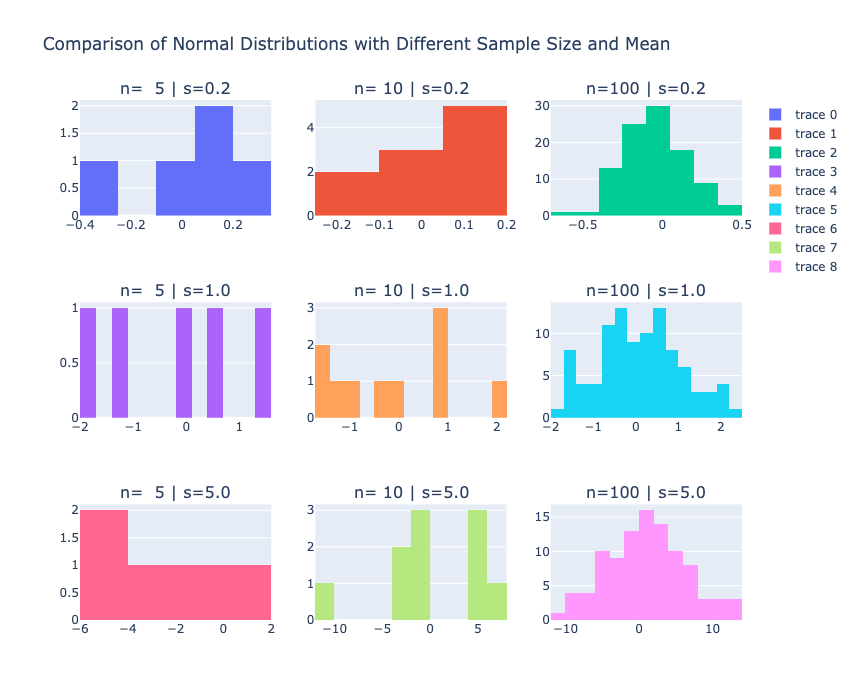

In [48]:
fig = make_subplots(rows=3, 
                    cols=3,
                    start_cell="top-left",
                    subplot_titles = ('n=  5 | s=0.2',
                            'n= 10 | s=0.2',
                            'n=100 | s=0.2',
                            'n=  5 | s=1.0',
                            'n= 10 | s=1.0',
                            'n=100 | s=1.0',
                            'n=  5 | s=5.0',
                            'n= 10 | s=5.0',
                            'n=100 | s=5.0'))

fig.add_trace(go.Histogram(x=df_nd1[0], xbins = dict(start=-1, end=1, size=0.15)), row=1, col=1)
fig.add_trace(go.Histogram(x=df_nd2[0], xbins = dict(start=-1, end=1, size=0.15)), row=1, col=2)
fig.add_trace(go.Histogram(x=df_nd3[0], xbins = dict(start=-1, end=1, size=0.15)), row=1, col=3)

fig.add_trace(go.Histogram(x=df_nd4[0], xbins = dict(start=-2, end=3, size=0.3)), row=2, col=1)
fig.add_trace(go.Histogram(x=df_nd5[0], xbins = dict(start=-2, end=3, size=0.3)), row=2, col=2)
fig.add_trace(go.Histogram(x=df_nd6[0], xbins = dict(start=-2, end=3, size=0.3)), row=2, col=3)

fig.add_trace(go.Histogram(x=df_nd7[0], xbins = dict(start=-12, end=14, size=2)), row=3, col=1)
fig.add_trace(go.Histogram(x=df_nd8[0], xbins = dict(start=-12, end=14, size=2)), row=3, col=2)
fig.add_trace(go.Histogram(x=df_nd9[0], xbins = dict(start=-12, end=14, size=2)), row=3, col=3)

fig.update_layout(height=700, width=700,
                  title_text="Comparison of Normal Distributions with Different Sample Size and Mean")

fig.show()

#### 2. Randomly sample data - poisson distribution

#### 3. Randomly sample data - bi-modal distribution

#### 4. Choose a number of columns with different shapes

##### Choose a number of columns with different shapes

In [49]:
df_2_s = df_2[['e_mort_exc_tbhiv_100k_lo','e_mort_exc_tbhiv_100k_hi']]

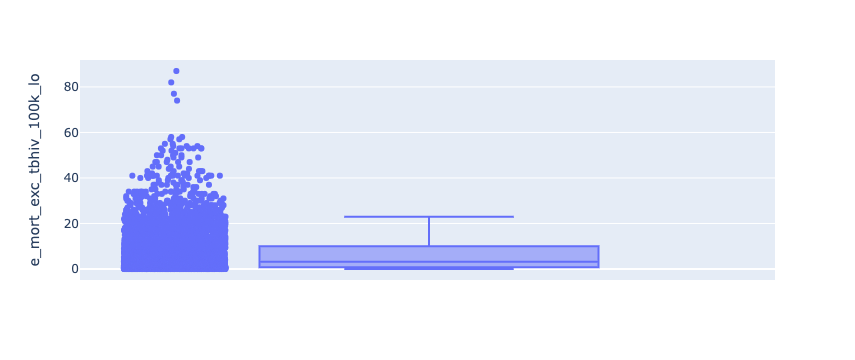

In [50]:
fig = px.box(df_2_s, y="e_mort_exc_tbhiv_100k_lo", points = 'all')
fig.show()

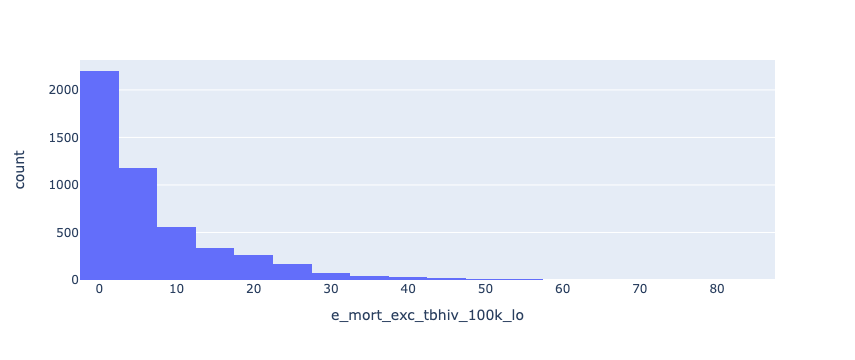

In [51]:
fig = px.histogram(df_2_s, x='e_mort_exc_tbhiv_100k_lo', nbins=25)
fig.show()

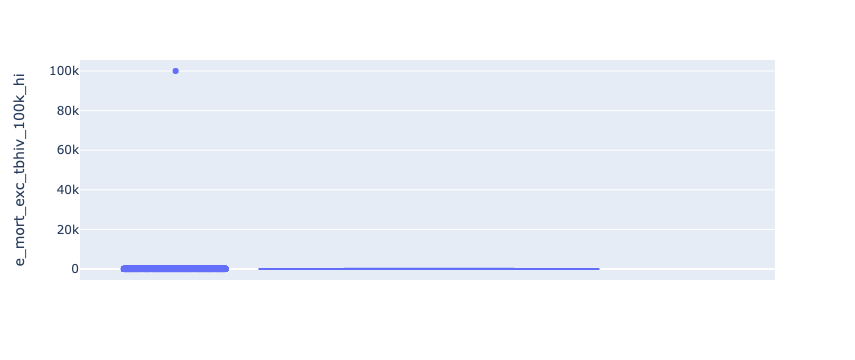

In [52]:
fig = px.box(df_2_s, y="e_mort_exc_tbhiv_100k_hi", points = 'all')
fig.show()

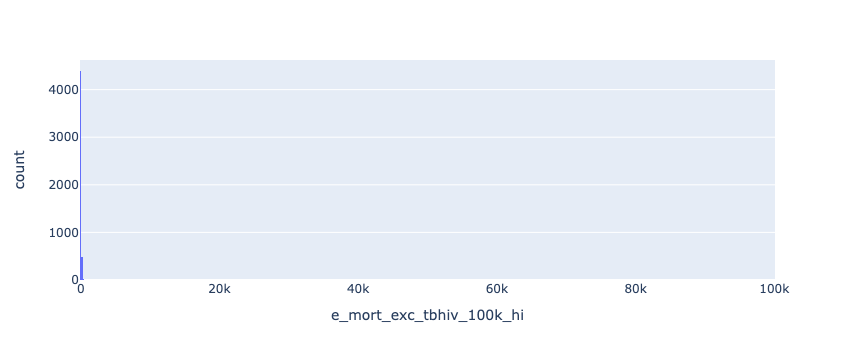

In [53]:
fig = px.histogram(df_2_s, x='e_mort_exc_tbhiv_100k_hi', nbins=1000)
fig.show()

##### Estimate conventional and robust descriptive statistics

In [54]:
df_2_s.describe()

e_mort_exc_tbhiv_100k_lo  e_mort_exc_tbhiv_100k_hi
count               4902.000000               4902.000000
mean                   7.022778                 52.846930
std                    9.322420               1428.832122
min                    0.000000                  0.000000
25%                    0.740000                  1.900000
50%                    3.150000                  8.750000
75%                   10.000000                 39.000000
max                   87.000000             100000.000000

##### For the e_mort_exc_tbhiv_100k_hi column, compare robust and conventional statistics

I selected this columns since this is one of the columns having an extreme outlier point very far from the rest of the sample. 

In [55]:
# calculate the median of the column
df_2_s.e_mort_exc_tbhiv_100k_hi.median()

8.75

In [56]:
# calculate the inter quantile range of the column (from describe table)
iqr = 39 - 1.9
iqr

37.1

##### Mean vs. Median

While the mean of the variable is 52.8, the median is 8.75. In this case using median makes more sense since the variable is positively skewed. Since the dataset has an outlier around 100k, it disrupts the distribution. and since it is only a single value, it is likely to be an error in the data.


##### Standard Deviation vs. Inter-Quartile Range 

While the standard deviation of the variable is 1428, the IQR equals 37.1. This comparison also shows us the importance of robust statistics. Standard deviation is very high compared to IQR and it can mislead the analyst because of an extreme outlier point (probably a measurement error) at around 100k.